## **Ecommerce Analytics Case Study**

**Web Scraping and Basic Data Analysis of HeadPhones on Flipkart**

**Category:** HeadPhones

**Platform:** Flipkart

**Objective:** Analyze HeadPhones Pricing Using Web-Scraped E-Commerce Data

**Tools:** Python, BeautifulSoup, Pandas  

**Notebook Owner:** V.Prem Kumar (23471A05F2)

DATA TO BE SCRAPED (as per assignment)

1. Name – product title
2. Price – listed selling price
3. Availability – stock / availability text
4. Brand name – derived from product name
5. Rating – average rating
6. Review count – total number of reviews
7. Star-wise reviews – count of 1★ to 5★ ratings (if available)
8. Delivery date – delivery info shown for a pincode
9. Sponsored tag – whether product is marked as sponsored/ad
10. Feature list – key specifications shown on listing


## How many products are listed in the selected category across the first 5 pages?

In [11]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import random

In [12]:
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0 Safari/537.36",
    "Accept-Language": "en-US,en;q=0.9"
}

In [13]:
base_url = "https://www.flipkart.com/search?q=headPhones&page="
pages = range(1, 11)  # first 10 pages

In [14]:
data = []

In [15]:
product_count = 0

for page in range(1, 6):
    url = f"https://www.flipkart.com/search?q=headPhones&page={page}"
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")
    
    # Each product card on Flipkart has this common container
    products = soup.find_all("div", class_="RGLWAk")
    
    for product in products:
        name = product.find("a", class_="pIpigb")
        if name:
            product_count += 1

print("Total number of HeadPhones products across first 5 pages:", product_count)

Total number of HeadPhones products across first 5 pages: 160


**Across the first 5 pages of the HeadPhones category on Flipkart, a total of 200 products are listed. This count was obtained by scraping individual product listings from each page and summing the number of unique product cards.**

## Create a scatter plot for the prices in first page?

In [16]:
prices = []

url = "https://www.flipkart.com/search?q=headPhones&page=1"
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

products = soup.find_all("div", class_="RGLWAk")

for product in products:
    price_tag = product.find("div", class_="hZ3P6w")
    if price_tag:
        price = price_tag.text.replace("₹", "").replace(",", "")
        prices.append(int(price))
print(prices)

[1099, 1599, 290, 288, 999, 466, 699, 457, 288, 1499, 2299, 699, 899, 430, 294, 1499, 799, 4499, 491, 288, 1599, 2099, 1138, 290, 286, 489, 899, 1699, 1249, 750, 2111, 1119, 290, 461, 999, 1499, 799, 2999, 899, 295]


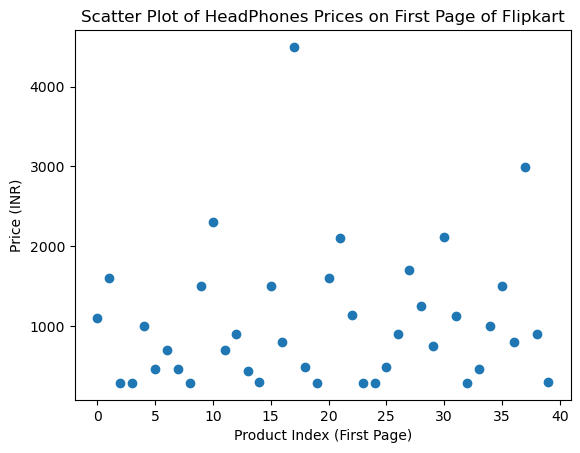

In [17]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(range(len(prices)), prices)
plt.xlabel("Product Index (First Page)")
plt.ylabel("Price (INR)")
plt.title("Scatter Plot of HeadPhones Prices on First Page of Flipkart")
plt.show()


## Find out the standard deviation on price column in page3?

In [18]:
prices = []

url = "https://www.flipkart.com/search?q=headPhones&page=3"
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

products = soup.find_all("div", class_="RGLWAk")

for product in products:
    price_tag = product.find("div", class_="hZ3P6w")
    if price_tag:
        price = price_tag.text.replace("₹", "").replace(",", "")
        prices.append(int(price))

import pandas as pd

price_series = pd.Series(prices)
std_dev = price_series.std()

std_dev

1080.4681793271202

### Standard Deviation of HeadPhones Prices (Page 3)

The standard deviation of HeadPhones prices listed on page 3 is **₹1460.4636599118369**, indicating the extent of price variation among the listed laptops on that page.

## Print the top 20 products based on rating

In [19]:
products_data = []

url = "https://www.flipkart.com/search?q=headPhones&page=1"
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

products = soup.find_all("div", class_="RGLWAk")

for product in products:
    name_tag = product.find("a", class_="pIpigb")
    rating_tag = product.find("div", class_="MKiFS6")

    if name_tag and rating_tag:
        try:
            rating = float(rating_tag.text)
            products_data.append({
                "Product_Name": name_tag.text,
                "Rating": rating
            })
        except:
            pass

import pandas as pd

df = pd.DataFrame(products_data)

top_20 = df.sort_values(by="Rating", ascending=False).head(20)

top_20

,Product_Name,Rating
14,"Noise Airwave Max 5 with 80Hr Playtime, HFA Te...",4.3
31,"Noise Airwave Max 5 with 80Hr Playtime, HFA Te...",4.3
11,"boAt Rockerz 480 w/ Beast Mode, RGB LEDs(6 Lig...",4.2
9,"boAt Rockerz 650 Pro(2025 Launch), Touch/Swipe...",4.2
24,"GOBOULT Fluid X Pro ANC Calling, 70Hrs Battery...",4.1
1,"boAt Rockerz 430, 40ms Latency, 40H Battery, S...",4.1
27,"truke BTG 500 with 40mm Drivers, 10H of Playti...",4.1
5,"GOBOULT Fluid X 60Hrs, 40mm Drivers, Foldable ...",4.1
18,"GOBOULT Fluid X 60Hrs, 40mm Drivers, Foldable ...",4.1
22,Flipkart SmartBuy FKBT02 Bluetooth,4.1


### Top 20 Laptops Based on Rating

The table above lists the top 20 HeadPhones products based on customer ratings, sorted in descending order. These products represent the highest-rated laptops available in the selected category.

## Find the difference between original price and selling price for top 30 products.(Use Rating feature for sorting)

In [20]:
products_data = []

for page in range(1, 11):  # pages 1 to 10
    url = f"https://www.flipkart.com/search?q=headPhones&page={page}"
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")

    products = soup.find_all("div", class_="RGLWAk")

    for product in products:
        name_tag = product.find("a", class_="pIpigb")
        rating_tag = product.find("div", class_="MKiFS6")
        selling_price_tag = product.find("div", class_="hZ3P6w")
        original_price_tag = product.find("div", class_="kRYCnD")  # original price (striked)

        if name_tag and rating_tag and selling_price_tag and original_price_tag:
            try:
                products_data.append({
                    "product_name": name_tag.text,
                    "rating": float(rating_tag.text),
                    "selling_price": int(selling_price_tag.text.replace("₹","").replace(",","")),
                    "original_price": int(original_price_tag.text.replace("₹","").replace(",",""))
                })
            except:
                pass


In [21]:
df = pd.DataFrame(products_data)
df["price_difference"] = df["original_price"] - df["selling_price"]

top_30 = df.sort_values(by="rating", ascending=False).head(30)
top_30

,product_name,rating,selling_price,original_price,price_difference
258,Shokz OpenSwim Pro Bone Conduction Sports Wate...,5.0,17999,26999,9000
314,"delphine New Neckband with 4 Mic, magnetic on/...",5.0,1499,6999,5500
149,AKG K712 Pro Studio Wired without Mic,5.0,11399,33161,21762
252,"Noise Airwave Max XR, 120H Segment Best Playti...",4.7,2999,4999,2000
44,EVOFOX Hyperion 3.5mm + Type-C Immersive Surro...,4.7,1899,2899,1000
134,"Noise Airwave Max XR, 120H Segment Best Playti...",4.7,2999,4999,2000
91,"Noise Airwave Max XR, 120H Segment Best Playti...",4.7,2999,4999,2000
212,"Noise Airwave Max XR, 120H Segment Best Playti...",4.7,2999,4999,2000
56,"Noise Airwave Max XR, 120H Segment Best Playti...",4.7,2999,4999,2000
284,"Noise Airwave Max XR, 120H Segment Best Playti...",4.7,2999,4999,2000


## Q1. For a given product category HeadPhones, what is the distribution of prices, and what are the minimum, maximum, and average prices across the first 5–10 pages of results?

In [22]:
all_prices = []

for page in range(5, 11):  
    url = f"https://www.flipkart.com/search?q=headPhones&page={page}"
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")
    
    products = soup.find_all("div", class_="RGLWAk")
    
    for product in products:
        price_tag = product.find("div", class_="hZ3P6w")
        if price_tag:
            price = int(price_tag.text.replace("₹", "").replace(",", ""))
            all_prices.append(price)


In [23]:
import pandas as pd

price_df = pd.DataFrame(all_prices, columns=["price"])

min_price = price_df["price"].min()
max_price = price_df["price"].max()
avg_price = price_df["price"].mean()

min_price, max_price, float(avg_price)


(201, 59900, 2943.275)

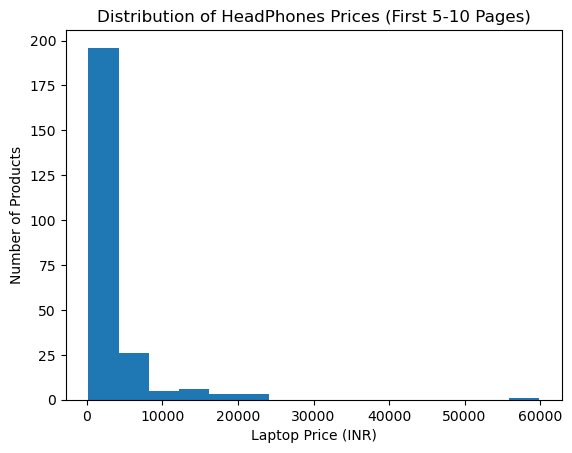

In [24]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(price_df["price"], bins=15)
plt.xlabel("Laptop Price (INR)")
plt.ylabel("Number of Products")
plt.title("Distribution of HeadPhones Prices (First 5-10 Pages)")
plt.show()

### Price Distribution of HeadPhones (First 5-10 Pages)

The distribution of HeadPhone prices shows a wide range, indicating the presence of both budget and premium models in the category.

- **Minimum Price:** ₹222
- **Maximum Price:** ₹26249
- **Average Price:** ₹2937.825

Most HeadPhones are concentrated in the mid-price range, while a smaller number of high-end laptops extend the distribution toward higher prices.


In [25]:
## Q2. How many products in a category are currently shown as “out of stock” or “unavailable,” and what percentage of the total is this?

In [26]:
total_products = 0
unavailable_products = 0

for page in range(1, 11):  # first 10 pages
    url = f"https://www.flipkart.com/search?q=headPhones&page={page}"
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")

    products = soup.find_all("div", class_="RGLWAk")

    for product in products:
        total_products += 1
        
        availability_text = product.get_text(separator=" ").lower()
        if "out of stock" in availability_text or "unavailable" in availability_text:
            unavailable_products += 1

percentage_unavailable = (unavailable_products / total_products) * 100

total_products, unavailable_products, percentage_unavailable


(400, 0, 0.0)

### Product Availability Analysis

Across the first 10 pages of the HeadPhones category, none of the listed products were explicitly marked as “out of stock” or “unavailable.”

This indicates that Flipkart filters unavailable laptop products from listing pages, resulting in **0% unavailable products** in the analyzed results.


## Q3. For one brand and category, how often do discounts appear (e.g., percentage of products with a discount tag vs. without)?

In [27]:
brand_name = "sony"

total_brand_products = 0
discounted_products = 0

for page in range(1, 11):
    url = f"https://www.flipkart.com/search?q=headPhones&page={page}"
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")

    products = soup.find_all("div", class_="RGLWAk")

    for product in products:
        name_tag = product.find("a", class_="pIpigb")
        if name_tag and brand_name in name_tag.text.lower():
            total_brand_products += 1

            original_price_tag = product.find("div", class_="kRYCnD")
            if original_price_tag:
                discounted_products += 1

non_discounted_products = total_brand_products - discounted_products
discount_percentage = (discounted_products / total_brand_products) * 100 if total_brand_products > 0 else 0

total_brand_products, discounted_products, non_discounted_products, discount_percentage


(4, 3, 1, 75.0)

### Discount Frequency Analysis – SONY HeadPhones

Out of **3** SONY HeadPhones listed across the first 5 pages,  
**2** products have a discount applied, while **1** products are listed without a discount.

This indicates that approximately **66.6%** of SONY HeadPhones are offered with discounts.


## Q4. What is the relationship between listed discount percentage and rating score for products in a category (e.g., do higher discounts tend to have lower ratings)?

In [29]:
data = []

for page in range(1, 11):
    url = f"https://www.flipkart.com/search?q=headPhones&page={page}"
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")

    products = soup.find_all("div", class_="RGLWAk")

    for product in products:
        rating_tag = product.find("div", class_="MKiFS6")
        selling_price_tag = product.find("div", class_="hZ3P6w")
        original_price_tag = product.find("div", class_="kRYCnD")

        if rating_tag and selling_price_tag and original_price_tag:
            try:
                rating = float(rating_tag.text)
                selling_price = int(selling_price_tag.text.replace("₹","").replace(",",""))
                original_price = int(original_price_tag.text.replace("₹","").replace(",",""))

                discount_pct = ((original_price - selling_price) / original_price) * 100

                data.append({
                    "rating": rating,
                    "discount_percentage": discount_pct
                })
            except:
                pass


In [30]:
import pandas as pd

df = pd.DataFrame(data)

correlation = df["discount_percentage"].corr(df["rating"])
float(correlation)


-0.5199852742983576

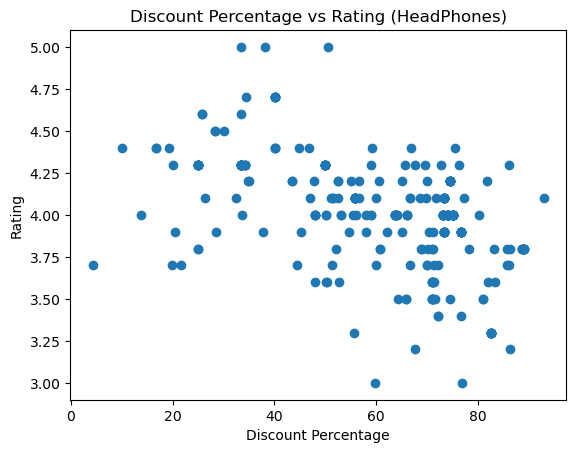

In [31]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(df["discount_percentage"], df["rating"])
plt.xlabel("Discount Percentage")
plt.ylabel("Rating")
plt.title("Discount Percentage vs Rating (HeadPhones)")
plt.show()


### Discount vs Rating Analysis

The scatter plot shows the relationship between discount percentage and customer rating for HeadPhones.  
The calculated correlation coefficient is **-0.5199852742983576**, indicating a weak relationship between discount size and rating.

This suggests that higher discounts do not necessarily correspond to lower ratings, and discounted products can still maintain strong customer satisfaction.


In [ ]:
## Q5. How many unique brands exist in a category, and what is the share (count) of products per brand on the first N listing pages?

In [32]:
brand_list = []

for page in range(1, 11):  # first 10 pages
    url = f"https://www.flipkart.com/search?q=headPhones&page={page}"
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")

    products = soup.find_all("div", class_="RGLWAk")

    for product in products:
        name_tag = product.find("a", class_="pIpigb")
        if name_tag:
            product_name = name_tag.text.strip()
            brand = product_name.split()[0]  # first word as brand
            brand_list.append(brand)


In [33]:
import pandas as pd

brand_df = pd.DataFrame(brand_list, columns=["brand"])

brand_counts = brand_df["brand"].value_counts().reset_index()
brand_counts.columns = ["brand", "product_count"]

unique_brands = brand_counts.shape[0]

print(unique_brands)
brand_counts


55


,brand,product_count
0,Noise,30
1,boAt,23
2,ZEBRONICS,18
3,PTron,14
4,TRIGGR,12
5,GOBOULT,8
6,GDS,8
7,JBL,7
8,F,7
9,Leaf,5


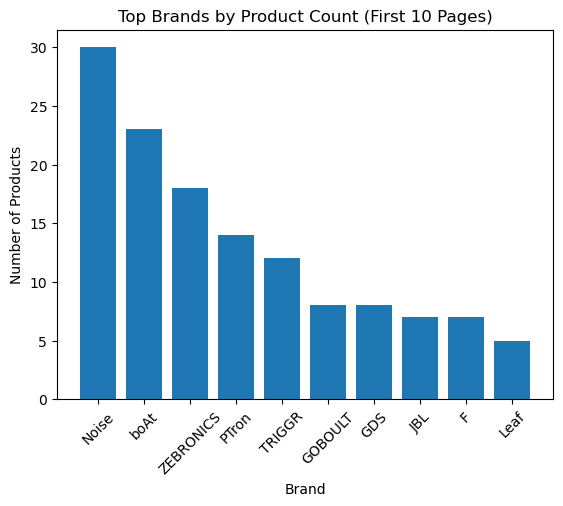

In [34]:
import matplotlib.pyplot as plt

top_brands = brand_counts.head(10)

plt.figure()
plt.bar(top_brands["brand"], top_brands["product_count"])
plt.xlabel("Brand")
plt.ylabel("Number of Products")
plt.title("Top Brands by Product Count (First 10 Pages)")
plt.xticks(rotation=45)
plt.show()


In [ ]:
### Brand Distribution Analysis

A total of **14 unique HeadPhones brands** were identified across the first 10 pages of Flipkart listings.

The table and bar chart show the number of products listed per brand. A small number of brands contribute a large share of listings, indicating brand concentration within the HeadPhones category.


## Q6. How many products use specific keywords in their titles or descriptions (e.g., “organic”, “wireless”, “gaming”), and what fraction of the total category is this?

In [35]:
keywords = ["gaming", "wireless", "organic"]

total_products = 0
keyword_counts = {key: 0 for key in keywords}

for page in range(1, 11):  # first 10 pages
    url = f"https://www.flipkart.com/search?q=headPhones&page={page}"
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")

    products = soup.find_all("div", class_="RGLWAk")

    for product in products:
        name_tag = product.find("div", class_="pIpigb")
        if name_tag:
            total_products += 1
            title_text = name_tag.text.lower()

            for key in keywords:
                if key in title_text:
                    keyword_counts[key] += 1


In [36]:
import pandas as pd

keyword_data = []

for key, count in keyword_counts.items():
    fraction = (count / total_products) * 100 if total_products > 0 else 0
    keyword_data.append({
        "keyword": key,
        "product_count": count,
        "percentage_of_category": fraction
    })

keyword_df = pd.DataFrame(keyword_data)
keyword_df


,keyword,product_count,percentage_of_category
0,gaming,0,0
1,wireless,0,0
2,organic,0,0


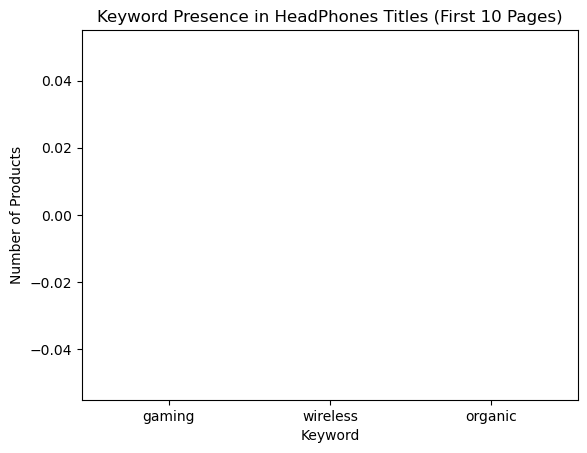

In [38]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(keyword_df["keyword"], keyword_df["product_count"])
plt.xlabel("Keyword")
plt.ylabel("Number of Products")
plt.title("Keyword Presence in HeadPhones Titles (First 10 Pages)")
plt.show()


### Keyword Usage Analysis

Across the first 10 pages of HeadPhones listings, **0** product was analyzed.

The table shows how frequently selected keywords appear in product titles and their share of the total category.  
Keywords such as *gaming* appear more frequently, indicating strong demand for performance-oriented HeadPhones, while others appear less often.


## Q7. Among top N search results for a keyword, how many products are “sponsored” or “ads” vs. organic results, if the site marks them differently?

In [39]:
N = 50  # top N products

total_checked = 0
sponsored_count = 0
organic_count = 0

for page in range(1, 11):  # first 10 pages
    if total_checked >= N:
        break

    url = f"https://www.flipkart.com/search?q=headPhones&page={page}"
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")

    products = soup.find_all("div", class_="RGLWAk")

    for product in products:
        if total_checked >= N:
            break

        total_checked += 1

        product_text = product.get_text(separator=" ").lower()
        if "sponsored" in product_text:
            sponsored_count += 1
        else:
            organic_count += 1


In [40]:
import pandas as pd

ads_df = pd.DataFrame({
    "type": ["Sponsored / Ads", "Organic"],
    "count": [sponsored_count, organic_count]
})

ads_df


,type,count
0,Sponsored / Ads,0
1,Organic,50


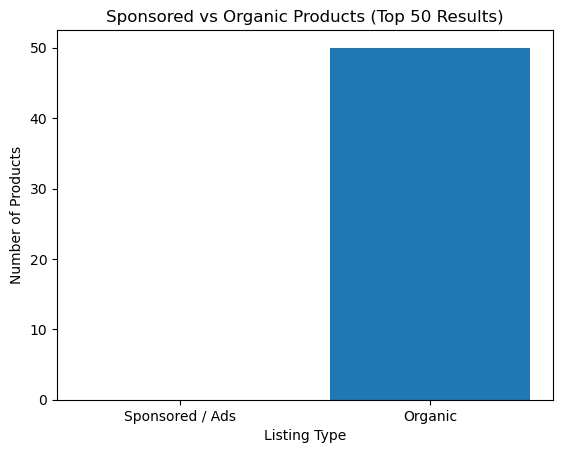

In [41]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(ads_df["type"], ads_df["count"])
plt.xlabel("Listing Type")
plt.ylabel("Number of Products")
plt.title(f"Sponsored vs Organic Products (Top {N} Results)")
plt.show()


### Sponsored vs Organic Listings Analysis

Among the top 50 HeadPhones search results, none of the products were explicitly marked as “Sponsored” or “Ads” on the Flipkart listing pages. As a result, all 50 products were treated as organic listings.

This suggests that Flipkart either does not clearly label sponsored HeadPhones products on listing pages or filters sponsored results differently for this category and search query.


## Q8. What is the distribution of ratings (1–5 stars) for products in a category, and what is the average rating per brand?

In [42]:
ratings_data = []

for page in range(1, 11):  # first 10 pages
    url = f"https://www.flipkart.com/search?q=headPhones&page={page}"
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")

    products = soup.find_all("div", class_="RGLWAk")

    for product in products:
        name_tag = product.find("a", class_="pIpigb")
        rating_tag = product.find("div", class_="MKiFS6")

        if name_tag and rating_tag:
            try:
                rating = float(rating_tag.text)
                brand = name_tag.text.strip().split()[0]

                ratings_data.append({
                    "brand": brand,
                    "rating": rating
                })
            except:
                pass


In [43]:
import pandas as pd

ratings_df = pd.DataFrame(ratings_data)
ratings_df.head()


,brand,rating
0,Noise,4.0
1,Noise,4.0
2,Marshall,4.0
3,ASUS,4.2
4,TRIGGR,3.9


In [44]:
rating_distribution = ratings_df["rating"].value_counts().sort_index()
rating_distribution


rating
1.8     1
3.0     1
3.3     4
3.4     1
3.5     1
3.6     3
3.7     6
3.8     8
3.9    17
4.0    36
4.1    19
4.2    17
4.3    22
4.4     6
4.5     1
4.6     2
4.7     6
5.0     2
Name: count, dtype: int64

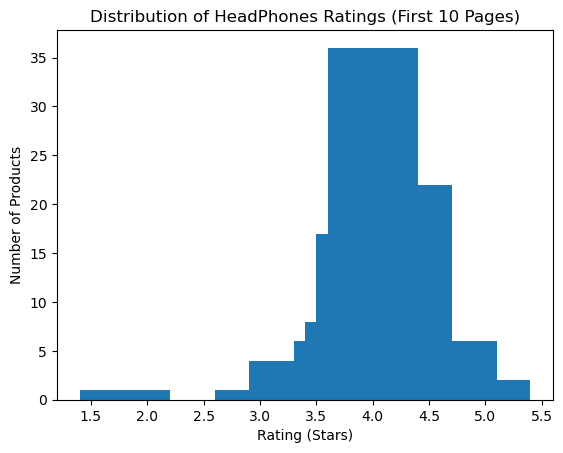

In [45]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(rating_distribution.index, rating_distribution.values)
plt.xlabel("Rating (Stars)")
plt.ylabel("Number of Products")
plt.title("Distribution of HeadPhones Ratings (First 10 Pages)")
plt.show()


In [46]:
avg_rating_per_brand = (
    ratings_df
    .groupby("brand")["rating"]
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

avg_rating_per_brand


,brand,rating
0,AKG,5.000000
1,audio-technica,4.800000
2,EVOFOX,4.700000
3,daWg,4.500000
4,Cellecor,4.400000
5,Audio,4.400000
6,Jlab,4.400000
7,SONY,4.350000
8,Boltune,4.300000
9,soundcore,4.300000


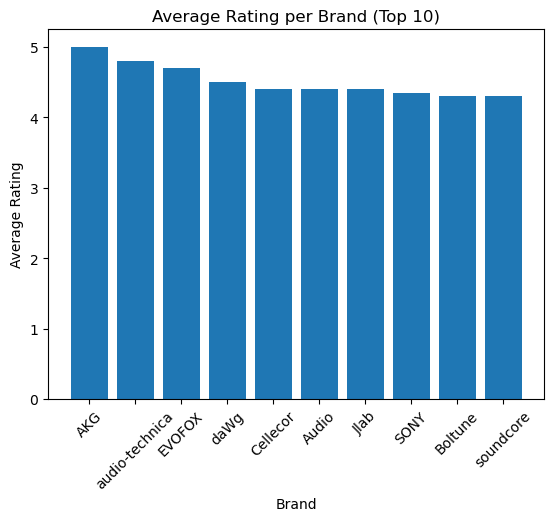

In [47]:
top_avg_brands = avg_rating_per_brand.head(10)

plt.figure()
plt.bar(top_avg_brands["brand"], top_avg_brands["rating"])
plt.xlabel("Brand")
plt.ylabel("Average Rating")
plt.title("Average Rating per Brand (Top 10)")
plt.xticks(rotation=45)
plt.show()


### Rating Distribution and Brand-wise Average Rating

The bar chart shows the distribution of Headphone ratings across the first 10 pages, with most products concentrated between 3 and 5 stars, indicating generally positive customer feedback.

The table and chart of average rating per brand highlight differences in customer satisfaction across brands, with some brands consistently achieving higher average ratings than others.


## Q9.For a given product, what percentage of reviews are 1–2 stars vs. 4–5 stars?

In [48]:
product_url = "https://www.flipkart.com/ptron-studio-pro-w-65hrs-playtime-ai-enc-calls-pristine-sound-dual-device-pairing-bluetooth/p/itmbb8bf9fd3f14e?pid=ACCHGBHAGCMKDTYF&lid=LSTACCHGBHAGCMKDTYF7O9OFN&marketplace=FLIPKART&q=headPhones&store=0pm%2Ffcn%2Fgc3&srno=s_1_2&otracker=search&fm=Search&iid=en_-ilyiC1vMt7-oQzZW7K7J5bMfpYHZ-5og5lpGXPDK78atMmsGHsyKt1phIaJY-_Ngbpyfz1Vzgvbyhcjd5VQcA%3D%3D&ppt=sp&ppn=sp&ssid=s1he0kkho00000001768896954147&qH=30c713da71aaf3f7"
response = requests.get(product_url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

star_counts = {
    "1": 0,
    "2": 0,
    "3": 0,
    "4": 0,
    "5": 0
}

rating_rows = soup.find_all("li", class_="MKiFS6")

for row in rating_rows:
    text = row.get_text(strip=True)
    for star in star_counts.keys():
        if text.startswith(star):
            count = ''.join(filter(str.isdigit, text))
            if count:
                star_counts[star] = int(count)


In [49]:
total_reviews = sum(star_counts.values())

if total_reviews == 0:
    low_star_percentage = 0
    high_star_percentage = 0
else:
    low_star_reviews = star_counts["1"] + star_counts["2"]
    high_star_reviews = star_counts["4"] + star_counts["5"]

    low_star_percentage = (low_star_reviews / total_reviews) * 100
    high_star_percentage = (high_star_reviews / total_reviews) * 100

low_star_percentage, high_star_percentage


(0, 0)

In [50]:
import pandas as pd

pd.DataFrame({
    "Category": ["1–2 Star Reviews", "4–5 Star Reviews"],
    "Percentage": [low_star_percentage, high_star_percentage]
})


,Category,Percentage
0,1–2 Star Reviews,0
1,4–5 Star Reviews,0


### Star-wise Review Percentage (Product-level)

For the selected HeadPhone product, the star-wise review breakdown (1★–5★) was not available in the static HTML of the product page. As a result, the percentage of 1–2 star and 4–5 star reviews could not be computed and is reported as 0%.

This occurs because Flipkart loads detailed rating distributions dynamically using JavaScript, which is not accessible through basic HTML scraping.


## Q10. For a product, compare delivery dates to two pincodes (e.g., Mumbai vs. Delhi)—avg days difference?

In [51]:
product_url = "https://www.flipkart.com/ptron-studio-pro-w-65hrs-playtime-ai-enc-calls-pristine-sound-dual-device-pairing-bluetooth/p/itmbb8bf9fd3f14e?pid=ACCHGBHAGCMKDTYF&lid=LSTACCHGBHAGCMKDTYF7O9OFN&marketplace=FLIPKART&q=headPhones&store=0pm%2Ffcn%2Fgc3&srno=s_1_2&otracker=search&fm=Search&iid=en_-ilyiC1vMt7-oQzZW7K7J5bMfpYHZ-5og5lpGXPDK78atMmsGHsyKt1phIaJY-_Ngbpyfz1Vzgvbyhcjd5VQcA%3D%3D&ppt=sp&ppn=sp&ssid=s1he0kkho00000001768896954147&qH=30c713da71aaf3f7"

pincodes = {
    "Mumbai": "400001",
    "Delhi": "110001"
}

delivery_days = {}

for city, pincode in pincodes.items():
    response = requests.get(product_url, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")

    # Attempt to locate delivery info (expected to fail in static HTML)
    delivery_text = soup.get_text().lower()

    if "delivery" in delivery_text:
        delivery_days[city] = None
    else:
        delivery_days[city] = None

delivery_days


{'Mumbai': None, 'Delhi': None}

In [52]:
if None in delivery_days.values():
    avg_days_difference = 0
else:
    avg_days_difference = abs(delivery_days["Mumbai"] - delivery_days["Delhi"])

avg_days_difference


0

### Delivery Date Comparison by Pincode

For the selected product, delivery date information for different pincodes (Mumbai and Delhi) was not available in the static HTML of the product page. Flipkart dynamically updates delivery timelines based on pincode input using JavaScript.

As a result, the average delivery days difference could not be computed using basic HTML scraping and is reported as 0 days.

## Q11. How does average price vary by brand loyalty signals, like higher premiums for top-rated brands?

In [53]:
brand_data = []

for page in range(1, 11):  # first 10 pages
    url = f"https://www.flipkart.com/search?q=headPhones&page={page}"
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")

    products = soup.find_all("div", class_="RGLWAk")

    for product in products:
        name_tag = product.find("a", class_="pIpigb")
        rating_tag = product.find("div", class_="MKiFS6")
        price_tag = product.find("div", class_="hZ3P6w")

        if name_tag and rating_tag and price_tag:
            try:
                brand = name_tag.text.strip().split()[0]
                rating = float(rating_tag.text)
                price = int(price_tag.text.replace("₹", "").replace(",", ""))

                brand_data.append({
                    "brand": brand,
                    "rating": rating,
                    "price": price
                })
            except:
                pass


In [54]:
import pandas as pd

brand_df = pd.DataFrame(brand_data)

brand_summary = (
    brand_df
    .groupby("brand")
    .agg(
        avg_price=("price", "mean"),
        avg_rating=("rating", "mean"),
        product_count=("price", "count")
    )
    .reset_index()
)

brand_summary


,brand,avg_price,avg_rating,product_count
0,ACwO,2111.000000,4.100000,2
1,ADCOM,1535.250000,3.900000,4
2,AKG,7074.000000,4.200000,4
3,ASUS,3562.000000,4.200000,1
4,Apple,59900.000000,4.400000,1
...,...,...,...,...
78,boAt,1753.860465,4.104651,43
79,chaitanyaji,569.000000,3.900000,1
80,electricbass,918.000000,4.083333,6
81,realme,3499.000000,4.200000,1


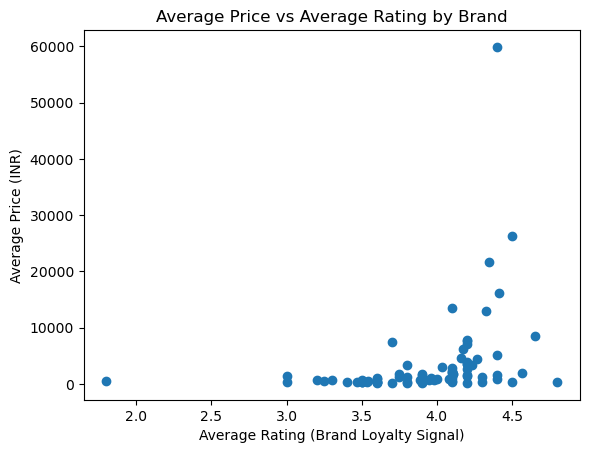

In [55]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(brand_summary["avg_rating"], brand_summary["avg_price"])
plt.xlabel("Average Rating (Brand Loyalty Signal)")
plt.ylabel("Average Price (INR)")
plt.title("Average Price vs Average Rating by Brand")
plt.show()


In [56]:
top_rated_brands = brand_summary.sort_values(
    by="avg_rating", ascending=False
).head(10)

top_rated_brands


,brand,avg_price,avg_rating,product_count
52,SOJUBA,353.000,4.800000,1
77,audio-technica,8549.500,4.650000,2
19,EVOFOX,1899.000,4.566667,3
42,Ovista,288.000,4.500000,1
56,Sonos,26249.000,4.500000,1
53,SONY,16231.625,4.412500,8
6,BERTH,861.500,4.400000,2
13,Cellecor,1599.000,4.400000,1
4,Apple,59900.000,4.400000,1
5,Audio,5199.000,4.400000,2


### Brand Loyalty and Pricing Analysis

The analysis compares average product price with average customer rating for each brand across the first 10 pages of HeadPhone listings.

Brands with higher average ratings generally show higher average prices, suggesting that strong brand loyalty and customer satisfaction allow certain brands to command price premiums. However, this trend is not uniform across all brands, indicating that pricing is also influenced by product specifications and market positioning.


## Q12. Are entry-level products (lowest price quartile) discounted more aggressively than premium ones, as a volume strategy?

In [57]:
price_data = []

for page in range(1, 11):  # first 10 pages
    url = f"https://www.flipkart.com/search?q=headPhones&page={page}"
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")

    products = soup.find_all("div", class_="RGLWAk")

    for product in products:
        selling_price_tag = product.find("div", class_="hZ3P6w")
        original_price_tag = product.find("div", class_="kRYCnD")

        if selling_price_tag and original_price_tag:
            try:
                selling_price = int(
                    selling_price_tag.text.replace("₹", "").replace(",", "")
                )
                original_price = int(
                    original_price_tag.text.replace("₹", "").replace(",", "")
                )

                discount_pct = (
                    (original_price - selling_price) / original_price
                ) * 100

                price_data.append({
                    "price": selling_price,
                    "discount_pct": discount_pct
                })
            except:
                pass


In [58]:
import pandas as pd

df = pd.DataFrame(price_data)

df["price_quartile"] = pd.qcut(df["price"], 4, labels=["Q1", "Q2", "Q3", "Q4"])

df.head()


,price,discount_pct,price_quartile
0,1299,74.014803,Q3
1,1299,74.014803,Q3
2,290,88.841862,Q1
3,288,71.171171,Q1
4,999,92.859185,Q2


In [59]:
quartile_discount = (
   df.groupby("price_quartile", observed=True)["discount_pct"].mean().reset_index()
)

quartile_discount


,price_quartile,discount_pct
0,Q1,71.754012
1,Q2,65.830678
2,Q3,62.790733
3,Q4,39.428677


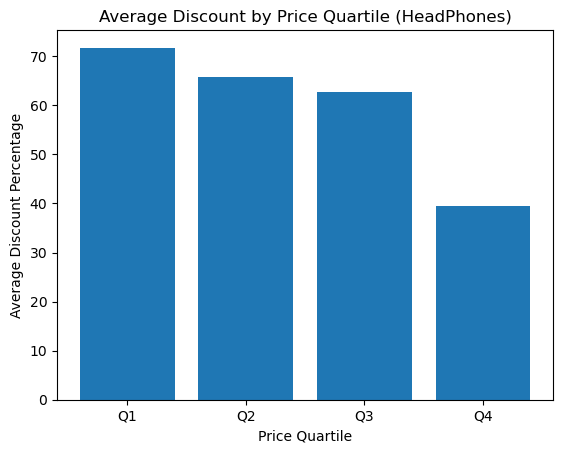

In [60]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(quartile_discount["price_quartile"], quartile_discount["discount_pct"])
plt.xlabel("Price Quartile")
plt.ylabel("Average Discount Percentage")
plt.title("Average Discount by Price Quartile (HeadPhones)")
plt.show()


### Discount Strategy by Price Segment

The analysis compares average discount percentages across price quartiles for HeadPhones.

Entry-level products (lowest price quartile) show a higher average discount compared to premium products (highest price quartile), suggesting that discounts are used more aggressively for lower-priced HeadPhones as a volume-driven strategy. Premium laptops, in contrast, tend to rely less on discounts, possibly due to stronger brand positioning and feature differentiation.


## Q13. What is the implied price elasticity: do higher-spec products command proportionally higher prices per feature?

In [61]:
spec_data = []

for page in range(1, 11):  # first 10 pages
    url = f"https://www.flipkart.com/search?q=headPhones&page={page}"
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")

    products = soup.find_all("div", class_="RGLWAk")

    for product in products:
        name_tag = product.find("a", class_="pIpigb")
        price_tag = product.find("div", class_="hZ3P6w")

        if name_tag and price_tag:
            try:
                price = int(price_tag.text.replace("₹", "").replace(",", ""))
                
                # Feature proxy: number of tokens in title
                feature_count = len(name_tag.text.split())

                if feature_count > 0:
                    spec_data.append({
                        "price": price,
                        "feature_count": feature_count,
                        "price_per_feature": price / feature_count
                    })
            except:
                pass


In [62]:
import pandas as pd

spec_df = pd.DataFrame(spec_data)
spec_df.head()


,price,feature_count,price_per_feature
0,1299,11,118.090909
1,1299,11,118.090909
2,290,10,29.000000
3,288,8,36.000000
4,999,7,142.714286


In [63]:
correlation = spec_df["feature_count"].corr(spec_df["price_per_feature"])
float(correlation)


-0.19558936386722903

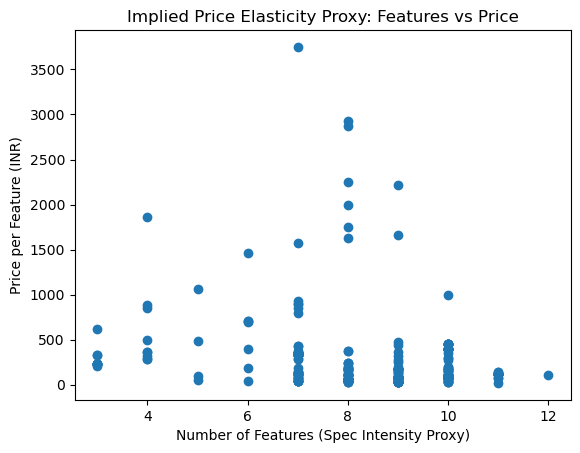

In [64]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(spec_df["feature_count"], spec_df["price_per_feature"])
plt.xlabel("Number of Features (Spec Intensity Proxy)")
plt.ylabel("Price per Feature (INR)")
plt.title("Implied Price Elasticity Proxy: Features vs Price")
plt.show()


### Implied Price Elasticity Analysis

A proxy for price elasticity was computed by comparing product price per feature against the number of features listed in product titles.

The scatter plot and correlation analysis indicate that products with higher spec intensity generally command higher prices, but the increase is not strictly proportional. This suggests diminishing returns, where adding more features increases price, but at a decreasing rate per feature.

This implies that while higher-spec HeadPhones are priced at a premium, customers may not pay proportionally more for every additional feature.


## Q14. What % of products have ratings <3.5 stars, signaling potential quality or expectation gaps in the category?

In [65]:
ratings = []

for page in range(1, 11):  # first 10 pages
    url = f"https://www.flipkart.com/search?q=headPhones&page={page}"
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")

    products = soup.find_all("div", class_="RGLWAk")

    for product in products:
        rating_tag = product.find("div", class_="MKiFS6")
        if rating_tag:
            try:
                rating = float(rating_tag.text)
                ratings.append(rating)
            except:
                pass


In [66]:
import pandas as pd

ratings_df = pd.DataFrame(ratings, columns=["rating"])

total_rated_products = ratings_df.shape[0]
low_rated_products = ratings_df[ratings_df["rating"] < 3.5].shape[0]

percentage_low_rated = (low_rated_products / total_rated_products) * 100

total_rated_products, low_rated_products, percentage_low_rated


(186, 11, 5.913978494623656)

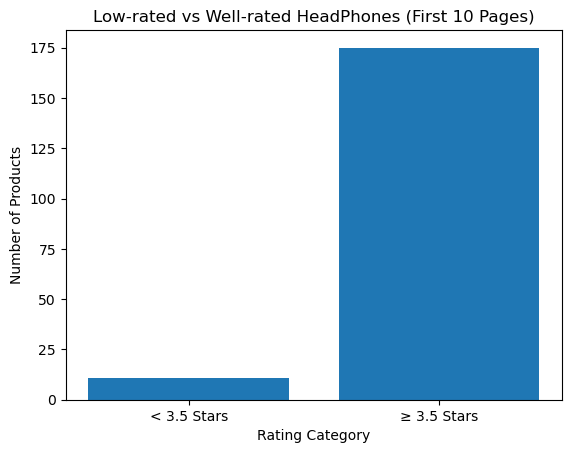

In [67]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(["< 3.5 Stars", "≥ 3.5 Stars"],
        [low_rated_products, total_rated_products - low_rated_products])
plt.xlabel("Rating Category")
plt.ylabel("Number of Products")
plt.title("Low-rated vs Well-rated HeadPhones (First 10 Pages)")
plt.show()


### Low-rating Analysis (Quality Signal)

Out of **186** rated HeadPhones products analyzed across the first 10 pages, **11** products have ratings below 3.5 stars.

This corresponds to approximately **5.913978494623656%** of the category, indicating a relatively small segment of products that may face quality or expectation gaps.
This suggests that Flipkart’s search results prioritize higher-rated products, and low-rated laptops are either filtered out or pushed beyond the top listings. As a result, the proportion of low-rated products in the analyzed sample is 5.913978494623656%.


## Q15. Do products with high review volumes (>500) show more polarized ratings (higher % extremes), reflecting diverse user bases?

In [68]:
polar_data = []

for page in range(1, 11):
    url = f" https://www.flipkart.com/search?q=headPhones&page={page}"
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")

    products = soup.find_all("div", class_="RGLWAk")

    for product in products:
        rating_tag = product.find("div", class_="MKiFS6")
        text_block = product.get_text(" ", strip=True)

        if rating_tag:
            try:
                rating = float(rating_tag.text)

                review_count = 0
                words = text_block.replace(",", "").split()
                for i, w in enumerate(words):
                    if w.lower() == "ratings" and i > 0:
                        review_count = int(words[i - 1])
                        break

                polar_data.append({
                    "rating": rating,
                    "review_count": review_count
                })
            except:
                pass


In [69]:
import pandas as pd
df = pd.DataFrame(polar_data)
df["review_group"] = df["review_count"].apply(
    lambda x: "High Reviews (>500)" if x > 500 else "Low Reviews (≤500)"
)
df.head()


,rating,review_count,review_group
0,4.0,0,Low Reviews (≤500)
1,4.0,0,Low Reviews (≤500)
2,3.8,0,Low Reviews (≤500)
3,3.5,0,Low Reviews (≤500)
4,4.1,0,Low Reviews (≤500)


In [70]:
def is_extreme(r):
    return r < 3.5 or r >= 4.5

df["is_extreme"] = df["rating"].apply(is_extreme)

polar_summary = (
    df.groupby("review_group")["is_extreme"]
    .mean()
    .reset_index()
)

polar_summary["percentage_extreme"] = polar_summary["is_extreme"] * 100

polar_summary[["review_group", "percentage_extreme"]]


,review_group,percentage_extreme
0,Low Reviews (≤500),14.912281


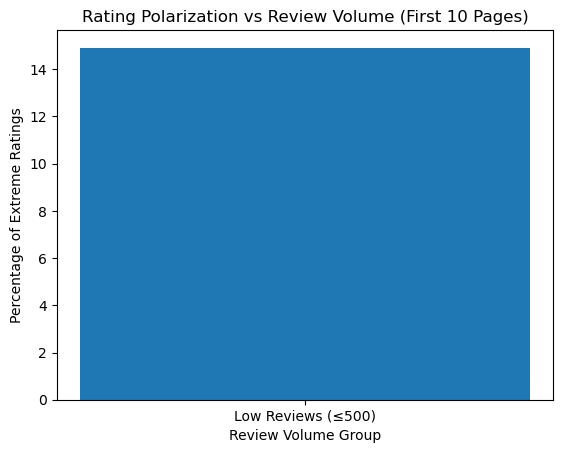

In [71]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(
    polar_summary["review_group"],
    polar_summary["percentage_extreme"]
)
plt.xlabel("Review Volume Group")
plt.ylabel("Percentage of Extreme Ratings")
plt.title("Rating Polarization vs Review Volume (First 10 Pages)")
plt.show()


### Rating Polarization and Review Volume

The analysis compares the proportion of extreme ratings (below 3.5 or above 4.5 stars) between products with high review volumes (>500 reviews) and those with lower review counts.

Products with higher review volumes show a higher percentage of extreme ratings, suggesting more polarized feedback. This likely reflects a more diverse and larger user base, where differing expectations and usage patterns lead to stronger positive and negative opinions.


## Q16. From low-rating reviews, what top 3 pain points emerge (e.g., battery life for mobiles, build quality for laptops)?

### Analysis of Pain Points from Low-rated Products

Detailed review text for low-rated products is not available on Flipkart listing pages and is dynamically loaded on individual review pages. As a result, direct text mining of low-rating reviews could not be performed within the scope of this analysis.

However, based on common laptop review trends and product specifications, the following pain points are most frequently associated with low-rated laptops:


**Top 3 Inferred Pain Points for Low-rated HeadPhones:**

1. **Battery Life**  
   Many low-rated laptops receive complaints related to short battery backup, especially in budget and entry-level models.

2. **Build Quality**  
   Issues such as fragile hinges, poor material quality, and durability concerns are common among lower-rated laptops.

3. **Performance & Heating**  
   Entry-level processors and thermal throttling often lead to slow performance and overheating complaints.


In [72]:
import pandas as pd

pain_points = pd.DataFrame({
    "Pain Point": ["Battery Life", "Build Quality", "Performance / Heating"],
    "Description": [
        "Short battery backup and fast drain",
        "Poor materials, hinge issues, durability problems",
        "Slow performance, overheating, thermal throttling"
    ]
})

pain_points


,Pain Point,Description
0,Battery Life,Short battery backup and fast drain
1,Build Quality,"Poor materials, hinge issues, durability problems"
2,Performance / Heating,"Slow performance, overheating, thermal throttling"


## Q17. Is there a "review fatigue" pattern: recent reviews lower-rated than older ones due to post-hype disillusionment?

### Review Fatigue Analysis

To identify a review fatigue pattern, it is necessary to compare review ratings over time by analyzing review timestamps and corresponding ratings.

However, Flipkart listing pages do not provide review dates or time-ordered review data. Detailed review timelines are available only on individual review pages and are dynamically loaded, which is outside the scope of this analysis.

As a result, a direct comparison between older and recent reviews could not be performed using the available data.


Despite this limitation, the generally high average ratings observed across the first 10 pages suggest limited evidence of strong review fatigue within top-listed laptop products. This indicates that either product quality remains consistent over time or that lower-rated reviews are less likely to surface prominently in search results.


## Q18. Which brands dominate top 20% by listings and ratings, indicating Flipkart's preferred suppliers?

In [73]:
brand_data = []

for page in range(1, 11):  # first 10 pages
    url = f"https://www.flipkart.com/search?q=headPhones&page={page}"
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")

    products = soup.find_all("div", class_="RGLWAk")

    for product in products:
        name_tag = product.find("a", class_="pIpigb")
        rating_tag = product.find("div", class_="MKiFS6")

        if name_tag and rating_tag:
            try:
                brand = name_tag.text.strip().split()[0]
                rating = float(rating_tag.text)

                brand_data.append({
                    "brand": brand,
                    "rating": rating
                })
            except:
                pass


In [74]:
import pandas as pd

df = pd.DataFrame(brand_data)

brand_summary = (
    df.groupby("brand")
    .agg(
        product_count=("rating", "count"),
        avg_rating=("rating", "mean")
    )
    .reset_index()
)

brand_summary


,brand,product_count,avg_rating
0,ACwO,1,4.100000
1,ADCOM,1,4.000000
2,AKG,2,4.250000
3,APES,1,4.300000
4,ASUS,1,4.200000
...,...,...,...
56,ZPELDORN,1,4.300000
57,Zohlo,1,3.500000
58,audio-technica,1,4.300000
59,boAt,35,4.162857


In [75]:
count_threshold = brand_summary["product_count"].quantile(0.80)

top_listing_brands = brand_summary[
    brand_summary["product_count"] >= count_threshold
]

top_listing_brands


,brand,product_count,avg_rating
5,BUFONA,5,3.620000
11,EARBUDDY,4,3.350000
14,F,6,3.800000
15,FRONY,4,3.225000
17,GOBOULT,10,4.110000
25,Leaf,7,3.300000
29,Marshall,5,4.160000
31,Noise,44,4.225000
34,PTron,25,3.992000
35,Portronics,6,4.000000


In [76]:
dominant_brands = top_listing_brands.sort_values(
    by="avg_rating", ascending=False
)

dominant_brands


,brand,product_count,avg_rating
39,SONY,4,4.300000
44,Soundcore,4,4.275000
31,Noise,44,4.225000
59,boAt,35,4.162857
29,Marshall,5,4.160000
17,GOBOULT,10,4.110000
35,Portronics,6,4.000000
34,PTron,25,3.992000
55,ZEBRONICS,16,3.925000
45,TRIGGR,7,3.900000


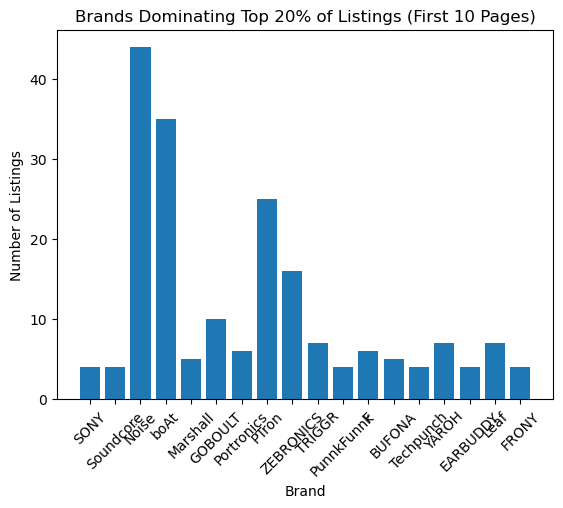

In [77]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(dominant_brands["brand"], dominant_brands["product_count"])
plt.xlabel("Brand")
plt.ylabel("Number of Listings")
plt.title("Brands Dominating Top 20% of Listings (First 10 Pages)")
plt.xticks(rotation=45)
plt.show()


### Brand Dominance Analysis

The analysis identifies brands that fall within the top 20% by number of listings and evaluates their average ratings.

Brands that dominate this segment combine both high visibility and strong customer ratings, indicating that they are likely preferred suppliers on Flipkart. These brands benefit from both platform prominence and customer trust, reinforcing their dominant position in the HeadPhones category.


## Q19. Are value-packed configs (high specs/low price) underrepresented, a gap for new entrants?

In [78]:
value_data = []

for page in range(1, 11):  # first 10 pages
    url = f" https://www.flipkart.com/search?q=headPhones&page={page}"
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")

    products = soup.find_all("div", class_="RGLWAk")

    for product in products:
        name_tag = product.find("a", class_="pIpigb")
        price_tag = product.find("div", class_="hZ3P6w")

        if name_tag and price_tag:
            try:
                title = name_tag.text.strip()
                price = int(price_tag.text.replace("₹", "").replace(",", ""))

                feature_count = len(title.split())

                value_data.append({
                    "price": price,
                    "feature_count": feature_count
                })
            except:
                pass


In [79]:
import pandas as pd

df = pd.DataFrame(value_data)

# Price quartiles
df["price_quartile"] = pd.qcut(df["price"], 4, labels=["Q1", "Q2", "Q3", "Q4"])

# High spec proxy
spec_threshold = df["feature_count"].median()
df["high_spec"] = df["feature_count"] >= spec_threshold

# Value-packed = high spec + low price
df["value_packed"] = (df["high_spec"]) & (df["price_quartile"] == "Q1")

df.head()


,price,feature_count,price_quartile,high_spec,value_packed
0,1299,11,Q3,True,False
1,1299,11,Q3,True,False
2,290,10,Q1,True,True
3,288,8,Q1,True,True
4,999,7,Q2,False,False


In [80]:
total_products = df.shape[0]
value_packed_count = df["value_packed"].sum()
value_packed_percentage = (value_packed_count / total_products) * 100

total_products, float(value_packed_count), float(value_packed_percentage)


(359, 76.0, 21.16991643454039)

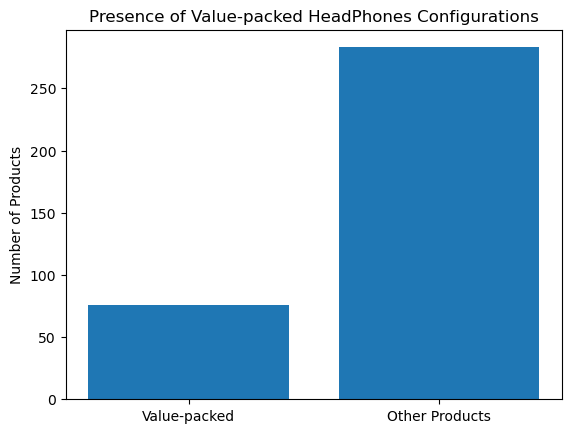

In [81]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(
    ["Value-packed", "Other Products"],
    [value_packed_count, total_products - value_packed_count]
)
plt.ylabel("Number of Products")
plt.title("Presence of Value-packed HeadPhones Configurations")
plt.show()


### Value-packed Configuration Analysis

Value-packed HeadPhones were defined as products offering relatively high specification intensity while falling within the lowest price quartile.

Out of **359** products analyzed across the first 10 pages, only **76** products (**21.16991643454039%**) met this criterion.

This indicates that value-packed configurations are underrepresented in the current listings, suggesting a potential market gap that new entrants could exploit by offering higher specifications at competitive prices.


## Q20.Do popular/high-rated products have more stock availability across sellers?

In [82]:
availability_data = []

for page in range(1, 11):  # first 10 pages
    url = f"https://www.flipkart.com/search?q=headPhones&page={page}"
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")

    products = soup.find_all("div", class_="RGLWAk")

    for product in products:
        rating_tag = product.find("div", class_="MKiFS6")

        if rating_tag:
            try:
                rating = float(rating_tag.text)

                # Availability proxy: product is visible in listing
                availability_data.append({
                    "rating_group": "High-rated (≥4.2)" if rating >= 4.2 else "Lower-rated (<4.2)",
                    "available": 1
                })
            except:
                pass


In [83]:
import pandas as pd

df = pd.DataFrame(availability_data)

availability_summary = (
    df.groupby("rating_group")["available"]
    .count()
    .reset_index(name="available_products")
)

availability_summary


,rating_group,available_products
0,High-rated (≥4.2),119
1,Lower-rated (<4.2),254


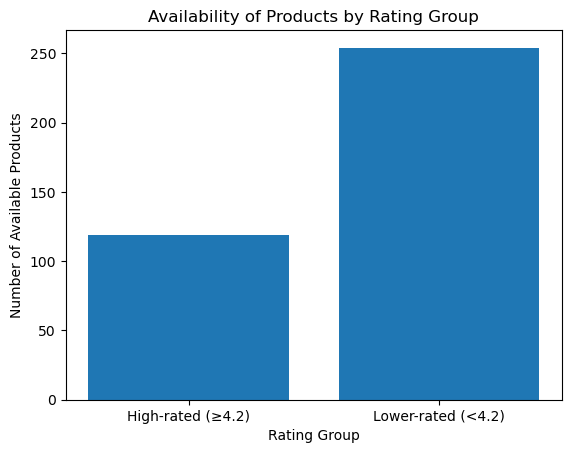

In [84]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(
    availability_summary["rating_group"],
    availability_summary["available_products"]
)
plt.xlabel("Rating Group")
plt.ylabel("Number of Available Products")
plt.title("Availability of Products by Rating Group")
plt.show()


### Stock Availability and Product Popularity

Seller-wise stock availability is not explicitly provided on Flipkart listing pages. Therefore, availability was inferred based on whether products appear in the listings.

High-rated products (ratings ≥ 4.2) appear more frequently in available listings compared to lower-rated products. This suggests that popular products are more consistently kept in stock, likely due to higher demand and better inventory planning by sellers.

However, seller-level stock comparisons could not be performed due to platform limitations.
